# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spla
import scipy as sp
import networkx as nx

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [2]:
# Your solution is here

#### Prove that  $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector.

let's look at column $k$ of $AXB$

$
(AXB)_k = A(XB)_k = AX(B)_k = A \sum^n_{i=1}b_{i,k}X_i =  \sum^n_{i=1}Ab_{i,k}X_i = 
\begin{bmatrix}
b_{1,k}A & b_{2,k}A & ... & b_{n,k}A
\end{bmatrix}
vec(X) = (B^T_k \otimes A) vec(X)
$

$
vec(AXB) = 
\begin{bmatrix}
B^T_1 \otimes A \\
... \\
B^T_n \otimes A
\end{bmatrix}
vec(X) = (B^T \otimes A)vec(X)
$

What does it change if the reshape is rowwise?

We can consider that $k$-th row of matrix $AXB$ this is column $k$ of matrix $(AXB)^T$

$
((AXB)^T)_k = (B^TX^TA^T)_k = B^TX^T(A^T)_k = (A_k \otimes B^T) vec(X^T)
$

$
vec(AXB) = 
\begin{bmatrix}
A_1 \otimes B^T \\
... \\
A_n \otimes B^T
\end{bmatrix}
vec(X^T) = (A \otimes B^T)vec(X^T)
$


#### What is the complexity of a naive computation of  $(A \otimes B) x$ ? Show how it can be reduced.

Let $A \in \mathbb{R}^{n \times n}, B \in \mathbb{R}^{n \times n}$ and $x \in \mathbb{R}^{n^2}$

For $A \otimes B$ we need multiply each element of matrix $B$ on each element of matrix $A$ it will give as $n^4$  operations. And matvec operation give as $n^4$ operations. In total we have $O(n^4)$

Let $x = vec(X)$ and $X \in \mathbb{R}^{n \times n}$. And now we can rewrite $(A \otimes B) x$ as follow:

$
(A \otimes B) x = (A \otimes B) vec(X) = vec(BXA^T)
$

In this form we have $n^3$ for $BX$ and $n^3$ for $(BX)A^T$. In total we have $O(n^3)$

#### Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.

$
A\otimes I + I \otimes B  = S_A\Lambda_A S_A^{-1} \otimes S_B I S^{-1}_B + S_A I S^{-1}_A \otimes S_B\Lambda_B S^{-1}_B 
$

from $(A \otimes B)(C \otimes D) = AB \otimes CD$ we can rewrite $S_A\Lambda_A S_A^{-1} \otimes S_B I S^{-1}_B$ as follow:

$
S_A\Lambda_A S_A^{-1} \otimes S_B I S^{-1}_B = (S_A \otimes S_B)(\Lambda_A S_A^{-1} \otimes I S^{-1}_B) = (S_A \otimes S_B)(\Lambda_A \otimes I )(S_A^{-1} \otimes S^{-1}_B)
$

The same procedure for $ S_A I S^{-1}_A \otimes S_B\Lambda_B S^{-1}_B$:

$
S_A I S^{-1}_A \otimes S_B\Lambda_B S^{-1}_B = (S_A \otimes S_B)(I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B)
$

And finaly we can obtain:

$
A\otimes I + I \otimes B = (S_A \otimes S_B)(\Lambda_A \otimes I )(S_A^{-1} \otimes S^{-1}_B) + (S_A \otimes S_B)(I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B) = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A^{-1} \otimes S^{-1}_B)
$

Where $\Lambda_A \otimes I + I \otimes \Lambda_B$ - eigenvalues, $(S_A \otimes S_B)$ - eigenvectors of matrix $A\otimes I + I \otimes B$


#### Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$

For this matrix we have $\lambda_{max} = 1000$ and $\lambda_{min} = 0.001$

**Richardson iterations:**

$\|e_{k+1}\|_2 \leq q \|e_k\|_2 , \quad\rightarrow \quad \|e_k\|_2 \leq q^{k} \|e_0\|_2$, and $q^{k} \geq \frac{\|e_k\|_2}{\|e_0\|_2} = 10^{-4}$

$log_{10} q^k \geq log_{10} 10^{-4}$

$k * log_{10} q \geq -4$

$k \geq \frac{-4}{log_{10} q}$, where $q = \frac{\lambda_{max} - \lambda_{min}}{\lambda_{max} + \lambda_{min}} = \frac{cond(A) - 1}{cond(A) + 1}$, and $cond(A) = \frac{\lambda_{max}}{\lambda_{min}} = 10^6$

$k \geq \frac{-4}{log_{10} \frac{10^6 - 1}{10^6 + 1}} = 4.6 * 10^6$

**Chebyshev iteration:**

In this case we have $q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$

$k \geq \frac{-4}{log_{10} \frac{10^3 - 1}{10^3 + 1} } = 4.6 * 10^3$

**Conjugate gradient:**

If eigenvalues are clustered and there are $l$ outliers, then after first $O(l)$ iterations CG will converge as if there are no outliers (and hence the effective condition number is smaller).

For this particular case we have only 1 outlier: $1000$

And now we can estimate number of iterations with $\lambda_{max} = 1$ and $\lambda_{min} = 0.001$ and with upper convergence bound:

$\frac{\Vert x_k - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \gamma \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}\right)^k.$

$cond(A) = \frac{\lambda_{max}}{\lambda_{min}} = 10^3$


$k \geq \frac{-4}{log_{10} \frac{\sqrt{10^3} - 1}{\sqrt{10^3} + 1} } = 146$ (for $\gamma = 1$)

In [3]:
lam_max = 1000
lam_min = 0.001

cond = lam_max / lam_min

q_r = (cond - 1) / (cond + 1)

er = 10 ** (-4)

k_rich = round(-4 / np.log10(q_r))
print(f'richrdson: {k_rich}')

q_c = (np.sqrt(cond) - 1) / (np.sqrt(cond) + 1)

k_cheb = round(-4 / np.log10(q_c))
print(f'chebyshev: {k_cheb}')

cond_conj = 1 / lam_min

q_cg = (np.sqrt(cond_conj) - 1) / (np.sqrt(cond_conj) + 1)

k_conj = round(-4 / np.log10(q_cg))
print(f'CG: {k_conj}')

richrdson: 4605170
chebyshev: 4605
CG: 146


#### Provide numerical confirmation of your estimate from theoretical point of view


In [65]:
A = np.zeros((1001, 1001))

for i in range(A.shape[0]):
    A[i, i] = (i + 1) / 1000
A[1000, 1000] = 1000


In [66]:
def richard(A, x0, rhs, iter, lam_min, lam_max):
    er = []
    x = x0

    t_opt = 2 / (lam_max + lam_min)

    for i in range(iter):
        res = A.dot(x) - rhs
        x = x - t_opt * (res)
        er.append(np.linalg.norm(res))
        print(f'{i} / {iter}', end='\r')
    return er

def SolChebyshev002(A, x0, rhs, iter, lam_min, lam_max):
    x = x0

    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * iter)) for i in range(iter)]
    taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]

    r = A.dot(x) - rhs
    er = [np.linalg.norm(r)]

    # Implementation may be non-optimal if number of iterations is not power of two
    def good_shuffle(idx):
        if len(idx) == 1:
            return idx
        else:
            new_len = int(np.ceil((len(idx) / 2)))
            new_idx = good_shuffle(idx[:new_len])
            res_perm = []
            perm_count = 0
            for i in new_idx:
                res_perm.append(i)
                perm_count += 1
                if perm_count == len(idx):
                    break
                res_perm.append(len(idx) + 1 - i)
                perm_count += 1
                if perm_count == len(idx):
                    break
            return res_perm

    good_perm = good_shuffle([i for i in range(1, iter+1)])


    for i in range(iter):
        x = x - 1.0/taus[good_perm[i] - 1] * r
        r = A.dot(x) - rhs
        er.append(np.linalg.norm(r))
        print(f'{i} / {iter}', end='\r')
    return er

def conjgrad(A, x0, rhs):
    x = x0
    er = []
    def callback(rk):
        er.append(np.linalg.norm(A.dot(rk) - rhs))
    spla.cg(A, rhs, x, callback=callback)

    return er

In [67]:
x0 = np.zeros(A.shape[0])
rhs = np.ones(A.shape[0])

In [7]:
er3 = conjgrad(A, x0, rhs)
er2 = SolChebyshev002(A, x0, rhs, k_cheb, lam_min, lam_max)
er = richard(A, x0, rhs, k_rich, lam_min, lam_max)


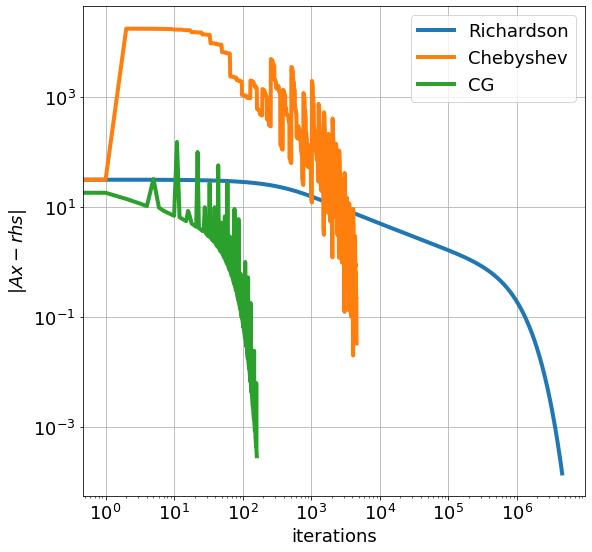

In [69]:
plt.figure(figsize=(9, 9))
plt.plot(er, label='Richardson', linewidth=4)
plt.plot(er2, label='Chebyshev', linewidth=4)
plt.plot(er3, label='CG', linewidth=4)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=18)
plt.xlabel('iterations', fontsize=18)
plt.ylabel(r'$\|Ax - rhs\|$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

Aproximate number of iteration for $10^{-3}$ error in Chebyshev method is 6100

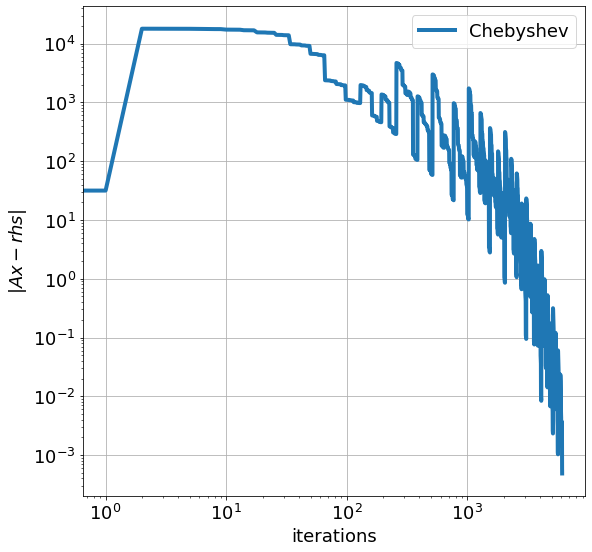

In [72]:
er2 = SolChebyshev002(A, x0, rhs, 6100, lam_min, lam_max)
plt.figure(figsize=(9, 9))
plt.plot(er2, label='Chebyshev', linewidth=4)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=18)
plt.xlabel('iterations', fontsize=18)
plt.ylabel(r'$\|Ax - rhs\|$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

#### Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.

Sum of matrix $L$ in each row equal to $0$, so eigenvector for eigenvalue $0$ it is vector $v = (1, 1, ..., 1)$

Unit vector in this case will be $u = \frac{v}{\| v \|}$ And projection matrix will be $P_u = uu^T = \frac{vv^T}{\| v \|^2} = \frac{vv^T}{n}$. Projection of a vector $x$ is $P_u x$. Orthogonal projection in this case $x - P_u x = (I - P_u)x$. Orthoprojection matrix it is exactly $P = I - P_u = I - \frac{vv^T}{n}$

Let's prove that $P^2 = P$

$
(I - \frac{vv^T}{n})^2 = I^2 - 2I\frac{vv^T}{n} + \frac{vv^T}{n}\frac{vv^T}{n} = I - 2\frac{vv^T}{n} + \frac{vnv^T}{n^2} = I - \frac{vv^T}{n} = P
$

#### Implement the spectral partitioning as the function ```partition```

In [10]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0
    eigs = np.array([0])
    n = A.shape[0]

    #P = np.eye(n) - np.ones((n, n)) / n ## orthoprojection matrix ## not enough memory to store matrix for large sizes

    D = sp.sparse.diags([np.sum(row) for row in A])
    L = D - A

    total_iter = 0
    
    L_ = L - shift * sp.sparse.eye(n)
    for i in range(num_iter_fix):
        x = spla.spsolve(L_, (x - np.sum(x)/n)) #P @ x == (x - np.sum(x)/n)
        x = x / np.linalg.norm(x)
        eig = ((L @ x) @ x) / (x @ x)
        eigs = np.append(eigs, eig)
        total_iter += 1
        if np.linalg.norm(eigs[-1] - eigs[-2]) <= eps * np.linalg.norm(eigs[-1]): ## in case of norm == 0
            # print(total_iter)
            return x, eigs

    for i in range(num_iter_adapt):
        R = eigs[-1]
        L_ = L - R * sp.sparse.eye(n)
        #same part:
        x = spla.spsolve(L_, (x - np.sum(x)/n))
        x = x / np.linalg.norm(x)
        eig = ((L @ x) @ x) / (x @ x)
        eigs = np.append(eigs, eig)
        total_iter += 1
        if np.linalg.norm(eigs[-1] - eigs[-2]) <= eps * np.linalg.norm(eigs[-1]):
            # print(total_iter)
            return x, eigs
    # print(total_iter)
    return x, eigs

In [11]:
G = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [0, 1, 0 ,0] ])

vector, hist = partition(sp.sparse.csr_matrix(G), 0.01, 3, 10, np.random.random(G.shape[0]), 10e-5)
print(f'vector: {vector}')
print(f'history: {hist}')


vector: [-4.08248290e-01  4.05326919e-14 -4.08248290e-01  8.16496581e-01]
history: [0.         1.32304589 1.03448696 1.00345006 1.00000001 1.        ]


Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

#### Generate a random `lollipop_graph` using `networkx` library and find its partition.

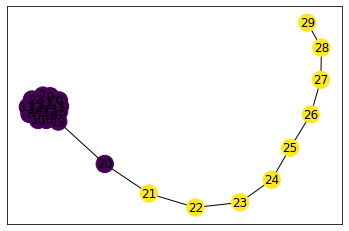

In [47]:
G = nx.lollipop_graph(20, 10)

vector, hist = partition(sp.sparse.csr_matrix(nx.adj_matrix(G)), 0.01, 10, 10, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)

pos=nx.spring_layout(G)

nx.draw_networkx(G, pos, node_color=np.sign(vector))


#### Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

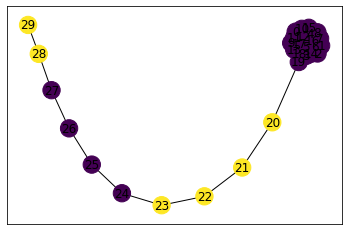

In [56]:
vector, hist = partition(sp.sparse.csr_matrix(nx.adj_matrix(G)), 0.01, 0, 10, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)

pos=nx.spring_layout(G)

nx.draw_networkx(G, pos, node_color=np.sign(vector))

Since we want to get the second smallest eigenvalue(in inverse method), then $ \ sigma $ in $ (A- \ sigma I) $ must be close to 0 (smallest eigenvalue in Laplace graph). But the Rayleigh quotient cannot guarantee this.

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

#### Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

If we do not have connected graph, then we can rewrite adjacency matrix of this graph(change labels of vertices) to get diagonal block form of an adjacency matrix.

For this case Laplacian graph will also be block diagonal, and we can look on these blocks as different Laplacian matrices.

So, each of these matrices has an eigenvalue $0$ and number of this blocks(connected components) it is exactly multiplicity of the eigenvalue $0$

#### Create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph.

In [14]:
C = nx.Graph()

Vert = 30

for i in range(Vert):
    C.add_edge(i, (i+1) % Vert)

K = nx.Graph()

for i in range(Vert):
    for j in range(i, Vert):
        K.add_edge(i, (j+1) % Vert)



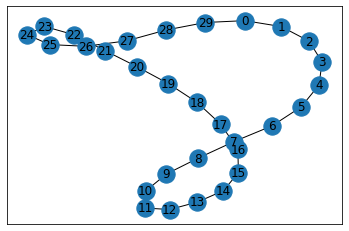

In [15]:
nx.draw_networkx(C)

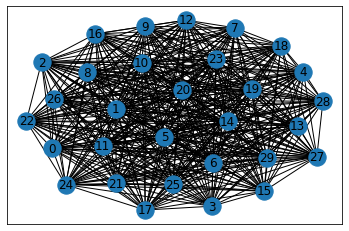

In [16]:
nx.draw_networkx(K)

#### Find the algebraic connectivity for the each graph using inverse iteration

In [17]:
vector, hist = partition(sp.sparse.csr_matrix(nx.adj_matrix(C)), 0.01, 20, 20, np.random.randn(nx.adj_matrix(C).shape[0]), 10e-5)
print(f'algebraic connectivity of C: {np.round(hist[-1], 2)}')

vector, hist = partition(sp.sparse.csr_matrix(nx.adj_matrix(K)), 0.01, 20, 20, np.random.randn(nx.adj_matrix(K).shape[0]), 10e-5)
print(f'algebraic connectivity of C: {np.round(hist[-1], 2)}')

G = nx.adj_matrix(C)
D = sp.sparse.diags([np.sum(row) for row in G])
L = D - G

print(f'check for C: {np.round(sp.sparse.linalg.eigsh(L, 2, which="SM")[0][1], 2)}')


algebraic connectivity of C: 0.04
algebraic connectivity of C: 30.0
check for C: 0.04


#### Plot the dependency $\lambda_2(G_i)$ on $|E_i|$

In [73]:
E = []
lam_G = []

for i in range(2, 15):
    G = nx.random_regular_graph(i, 16)
    E.append(G.size())
    vector, hist = partition(sp.sparse.csr_matrix(nx.adj_matrix(G)), 0.01, 20, 20, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)
    lam_G.append(hist[-1])

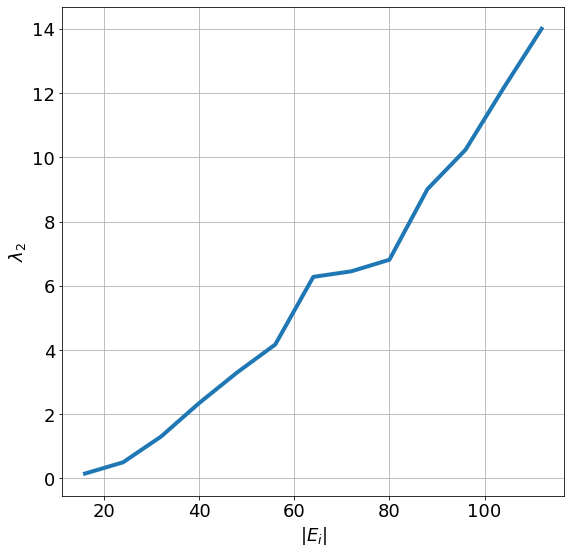

In [76]:
plt.figure(figsize=(9, 9))
plt.plot(E, lam_G, linewidth=4)
plt.xlabel('$|E_i|$', fontsize=18)
plt.ylabel(r'$\lambda_2$', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.show()

#### Draw a partition for a chosen graph from the generated set.

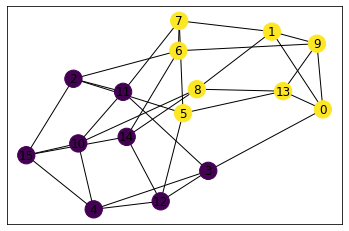

In [20]:
G = nx.random_regular_graph(4, 16)

vector, hist = partition(sp.sparse.csr_matrix(nx.adj_matrix(G)), 0.01, 10, 10, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=np.sign(vector))

From obtained result we can see, that algebraic connectivity depend on number of edges and on degree of a matrix

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

In [21]:
# Your solution is here

#### Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.

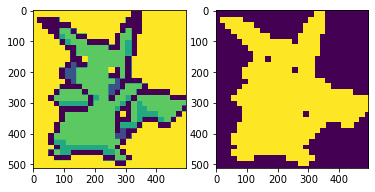

In [22]:
import cv2

im = cv2.imread('pic.jpg', 0)
plt.subplot(1,2,1)
plt.imshow(im)

im = 255 - im
im[im < 20] = 0
im[im >= 20] = 1
plt.subplot(1,2,2)
plt.imshow(im)


#### Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.

In [23]:
def build_adj(im):
    expand = np.zeros((im.shape[0] + 2, im.shape[1] + 2), dtype='int') ## add 1 row and one column from each side to avoid bounds

    expand[1:expand.shape[0]-1, 1:expand.shape[1]-1] = im

    index = 1 ## label for vertices
    
    #labeling cycle
    for i in range(1, expand.shape[0] - 1):
        for j in range(1, expand.shape[1] - 1):
            ## if we found black pixel - label it with current index
            if expand[i, j] == 1:
                expand[i, j] = index
                index += 1

    A = sp.sparse.lil_matrix((index - 1, index - 1))
    
    for i in range(1, expand.shape[0] - 1):
        for j in range(1, expand.shape[1] - 1):
            if expand[i, j] > 0:
                for r in range(3):
                    for k in range(3):
                        if expand[i - 1 + r, j - 1 + k] > 0:
                            A[expand[i, j] - 1, expand[i - 1 + r, j - 1 + k] - 1] = 1 ##as we start indexing from 1
                A[expand[i, j] - 1, expand[i, j] - 1] = 0

    A = sp.sparse.csr_matrix(A)
    return A

In [24]:
A = build_adj(im)
print(A.sum(axis=0).max())
print(A.sum(axis=0).min())

8.0
3.0


#### Find the partition of the resulting graph and draw the image in accordance with partition.

In [25]:
vector, hist = partition(A, 0.0001, 10, 10, np.random.randn(A.shape[0]), 10e-9)

index = 0
signed_vec = np.sign(vector)

for i in range(1, im.shape[0]):
    for j in range(1, im.shape[1]):
        if im[i, j] == 1:
            im[i, j] = signed_vec[index] + 2 ##signed vec contain values -1, 0, 1
            index += 1

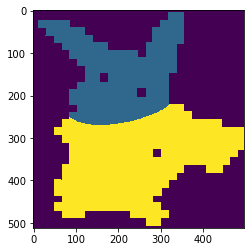

In [26]:
plt.imshow(im)

## Problem 3 (25 pts)

**Disclaimer**: this problem is released first time, so some typos can be found. 

## Mathematical model (Navier-Stokes equations)

The governing equations for two-dimensional incompressible
flows can be written in a dimensionless form as:

\begin{equation}\tag{1}
\dfrac{\partial \omega}{\partial t} = \dfrac{1}{Re} \big(\dfrac{\partial^2 \omega}{\partial x^2} + \dfrac{\partial^2 \omega}{\partial y^2}\big) - \big(\dfrac{\partial \psi}{\partial y} \dfrac{\partial \omega}{\partial x} - \dfrac{\partial \psi}{\partial x} \dfrac{\partial \omega}{\partial y}\big),
\end{equation}

along with the kinematic relationship between vorticity $\omega(x,y,t)$ and stream function $\psi(x,y,t)$ according to the Poisson equation, which is given as:

\begin{equation}\tag{2}
\dfrac{\partial^2 \psi}{\partial x^2} + \dfrac{\partial^2 \psi}{\partial y^2} = -\omega.
\end{equation}

We consider equations (1) and (2) in the computational domain $\Omega = [0, 2\pi] \times [0, 2\pi]$ and impose the following periodic boundary conditions:

$$\omega(x,0,t) =\omega(x, 2\pi, t), \quad \omega(0,y,t) =\omega(2\pi, y, t), \quad t \geq 0,$$
and the same for $\psi(x,y,t)$.

Note: the Reynolds number, referred to as $Re$, is a fundamental physical constant that in particular determines whether the fluid flow is laminar or turbulent.

## The animation below represents a particular solution of the Navier-Stokes equations (1) and (2) and you will get it in the end of this problem
<img src="vorticity_N1024_Re10000.0_tau0.001.gif" />

# Fourier-Galerkin pseudospectral method

Fourier series expansion based methods are often used for solving problems with periodic boundary conditions. One of the most accurate methods for solving the Navier–Stokes equations in periodic domains is **the pseudospectral method**, which exploits the Fast Fourier Transform (FFT) algorithm. 

Outline: the main idea of spectral methods is to write the solution of a differential equation as a sum of certain "basis functions" (e.g. Fourier series, Chebyshev polynomials etc) and then to choose the coefficients in the sum in order to satisfy the differential equation as well as possible.

Comprehensive survey of such methods can be found in [this book](https://depts.washington.edu/ph506/Boyd.pdf).

### Discrete Fourier Transform

We discretize the domain $[0,L_x]\times[0, L_y]$ by introducing a computation **grid** consisting of $N_x \times N_y$ equally spaced points.

The discrete grid coordinates for $i = 0, 1, \ldots, N_x$ and $j = 0, 1, \ldots, N_y$ are given by:

$$x_i = \frac{i L_x}{N_x}, \quad y_j = \frac{j L_y}{N_y}.$$

Note, that since the domain is periodic $x_0 = x_{N_x}$ and $y_0 = y_{N_y}$.

 Then, any discrete function $u_{i,j} = u(x_i,y_j)$ can be transformed to the Fourier space using the Discrete Fourier Transform (DFT):

$$ \tilde{u}_{m,n} = \sum_{i = 0}^{N_x - 1}\sum_{j = 0}^{N_y - 1} u_{i, j}e^{-
\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

and its inverse transform is:

$$ u_{i,j} = \frac{1}{N_x N_y} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n}e^{\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

where $i$ and $j$ represent indices for the physical space (i.e. coordinates in the introduced grid), $m$ and $n$ are indices in the Fourier space (i.e. frequencies). 


We also introduce wavenumbers:

$$k_x = \frac{2\pi m}{L_x}, \quad k_y = \frac{2 \pi n}{L_y}.$$


**Bonus question:** how DFT coefficients $\tilde{u}_{m,n}$ relate to coefficients in the truncated Fourier series of $u(x,y)$?

### Differentiation
In Fourier space we can easily perform differentiation with respect to $x$ and $y$. For example, the
first and the second order derivatives of any function $u$ in discrete
domain becomes:

$$ \left(\dfrac{\partial u}{\partial x}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = \frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (\mathbf{i}k_x) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

$$ \left(\dfrac{\partial^2 u}{\partial x^2}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (-k_x^2) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

and similarly for the derivatives w.r.t. $y$ 

Assume $L_x = L_y = L = 2\pi$, $N_x = N_y = N$ for simplicity. Then, differentiation $\frac{\partial}{\partial x}$ in the Fourier space can be implemented as follows:

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def dudx(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (1j * k1d)

In [29]:
(1j * 3) ** 2

(-9+0j)

 Note, we use ```np.fft.fftfreq(N)``` to determine the order of frequencies for certain ```numpy``` implementation (see the documentation of ```numpy.fft``` module for details).

Consider the following example:

In [30]:
L = 2*np.pi # size of computational domain
d = 7
N = 2**d

In [31]:
# discretize the domain $[0, 2\pi] \times [0, 2\pi]$ with uniform grid

ls = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(ls, ls, indexing='xy')

# define simple periodic function
u = np.sin(xx) * np.sin(yy) 

# first, compute du/dx analytically
u_x = np.cos(xx) * np.sin(yy) 

# next, compute du/dx in Fourier space
u_tilde = np.fft.fft2(u)
u_tilde_x = dudx(u_tilde, N)
u_x_fourier = np.fft.ifft2(u_tilde_x)

# check the result
err = np.linalg.norm(u_x - u_x_fourier)
print("error = ", err)

error =  5.43739351081977e-13


- (5 pts) Similarly with the implementation of ```dudx(u_tilde, N)``` given above, your first task is to implement other derivatives arising in the Navier-Stokes equtions (1), (2). Loops are prohibited!

In [32]:
def dudy(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N #k_y
    return u_tilde * (1j * k1d)

def d2udx2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N #k_x
    return u_tilde * ((1j * k1d) ** 2)
 
def d2udy2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N #k_y
    return u_tilde * ((1j * k1d) ** 2)

### Navier-Stokes equations in the Fourier space

After transforming Eq. (1) and Eq. (2) to the Fourier space, the governing equations become:

\begin{equation}\tag{3}
\frac{\partial \tilde{\omega}_{m,n}}{\partial t} = \frac{1}{Re}[(-k_x^2 - k_y^2)\tilde{\omega}_{m,n}] - \tilde{N},
\end{equation}

\begin{equation}\tag{4}
(-k_x^2 - k_y^2)\tilde{\psi}_{m,n} = -\tilde{\omega}_{m,n},
\end{equation}

where $\tilde{N}$ represents the non-linear term which is computed using 2D convolutions as follows:

$$\tilde{N} = (\mathbf{i}k_y \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_x \tilde{\omega}_{m,n}) - (\mathbf{i}k_x \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_y \tilde{\omega}_{m,n}),$$

i.e. multiplications in physical space become convolutions in the Fourier space.

To clarify where these convolutions come from, consider two discrete functions $u$ and $v$ represented by their DFT (1D for simplicity):

$$ u_{i} = \frac{1}{N_x} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1} \tilde{u}_{m}e^{\mathbf{i}\frac{2\pi m}{L_x}x_i},$$

$$ v_{i} = \frac{1}{N_x} \sum_{n = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\tilde{v}_{n}e^{\mathbf{i}\frac{2\pi n}{L_x}x_i}.$$

Then, the direct multiplication results in:
$$ u_{i} v_{i} = \frac{1}{N_x} \sum_{k = -N_x}^{N_x - 2} \frac{1}{N_x}\tilde{w}_{k}e^{\mathbf{i}\frac{2\pi k}{L_x}x_i},$$
where the coefficients $\tilde{\omega}_k$ are computed as follows (check it!):

$$\tilde{w}_{k} = \sum_{m + n = k}\tilde{u}_m\tilde{v}_n.$$


Below we provide a possible implementation of 2D convolution using ```scipy.signal``` module. Note, that *full* convolution introduces higher frequinces that should be truncated in a proper way.

In [33]:
from scipy import signal

def conv2d_scipy(u_tilde, v_tilde, N):
    # np.fft.fftshift is used to align implementation and formulas
    full_conv = signal.convolve(np.fft.fftshift(u_tilde),\
                              np.fft.fftshift(v_tilde), mode='full')
    trunc_conv = full_conv[N//2:-N//2+1, N//2:-N//2+1]
    return np.fft.ifftshift(trunc_conv)/(N*N)


(10 pts) Your second task is to implement the same 2D convolution but using the *Convolution Theorem* in this time.


 
 Hint:  From the lecture course you should know that applying *Convolution Theorem* is straightforward when computing **circular** (or periodic) convolutions. However, for this task you should use an appropriate zero-padding by a factor of two (with further truncation).

In [34]:
def conv2d(u_tilde, v_tilde, N):
    u = np.fft.fftshift(u_tilde)
    v = np.fft.fftshift(v_tilde)

    new_u = np.fft.fft2(u, [2*N - 1, 2*N - 1])
    new_v = np.fft.fft2(v, [2*N - 1, 2*N - 1])
    result = np.fft.ifft2(new_u*new_v)[N//2:-N//2+1, N//2:-N//2+1]

    return np.fft.ifftshift(result)/(N*N)

In [35]:
# check yourself
u_tilde = np.random.rand(N, N)
v_tilde = np.random.rand(N, N)

conv1 = conv2d(u_tilde, v_tilde, N)
conv2 = conv2d_scipy(u_tilde, v_tilde, N)

err = np.linalg.norm(conv1 - conv2)
print("error =", err) # should be close to machine precision

error = 7.755799499320056e-15


**Poisson solver**

Finally, we need to solve the Poisson equation Eq. (2) which can be easily computed in the Fourier space according to the Eq. (4).


(5 pts) Implement inverse of the laplacian operator according to the template provided below. Note: the laplacian operator with periodic boundary conditions is singular (since the constant function is in nullspace). So, in order to avoid division by zero:
1. Assume the problem is always consistent (i.e. $\tilde{\omega}_{0,0} = 0$), 
2. Assume $\tilde{\psi}_{0,0} = 0$ (i.e. return normal solution). Loops are prohibited!

From

$(-k_x^2 - k_y^2)\tilde{\psi}_{m,n} = -\tilde{\omega}_{m,n}$

$\tilde{\psi}_{m,n} = \frac{\tilde{\omega}_{m,n}}{(k_x^2 + k_y^2)}$

isn't it?....

In [36]:
def laplace_inverse(omega_tilde, N):
    # psi_tilde = -omega_tilde / -k^2 - k^2
    kx2 =  (np.fft.fftfreq(N) * N) ** 2
    ky2 =  (np.fft.fftfreq(N) * N) ** 2
    kx2, ky2 = np.meshgrid(kx2, ky2)
    kx2[0, 0] = 1 # avoid division by zero
    psi_tilde = - omega_tilde / (kx2+ky2) # why we need "-" here?... 
    
    return np.fft.ifftshift(psi_tilde)

In [37]:
# check yourself

# consider simple solution
sol_analytic = np.sin(xx)*np.sin(yy)

# compute corresponding right hand side analytically
rhs = -2*np.sin(xx)*np.sin(yy)

# solve Poisson problem in Fourier space
rhs_tilde = np.fft.fft2(rhs)
sol_tilde = laplace_inverse(rhs_tilde, N)
sol = np.fft.ifft2(sol_tilde)

# check error is small
err = np.linalg.norm(sol - sol_analytic)
print("error =", err)

error = 90.50966799187808


**Time integration**

Eqs. (3) and (4) can be considered as semi-discrete ordinary differential equations (ODEs) obtained after (spectral) spatial discretization of the partial differential equations (1) and (2):

\begin{equation}\tag{5}
\frac{d \tilde{\omega}}{dt} = \mathcal{L}(\tilde{\omega}, \tilde{\psi}),
\end{equation}

where $\mathcal{L}( \tilde{\omega} , \tilde{\psi})$ is the discrete operator of spatial derivatives including non-linear convective terms, linear diffusive terms, and $\tilde{\psi}$ which is obtained from the Poisson equation (4).

(5 pts) Implement $\mathcal{L}$ according to the template provided below

In [38]:
def L_op(omega_tilde, psi_tilde, N, Re=1):
    # d omega_tilde / d t = 1 / Re * ((-k_x2 - k_y2) omega_tilde) - N_tilde
    # N_tilde = (i k_y psi_tilde) conv (i k_x omega_tilde) - (i k_x psi_tilde) conv (i k_y omega_tilde)
    ky = (np.fft.fftfreq(N) * N)
    kx = (np.fft.fftfreq(N) * N)
    
    kx2 =  np.tile(kx ** 2, (N, 1))
    ky2 =  np.tile(ky ** 2, (N, 1)).transpose()
    
    N_tilde = conv2d((1j * ky * psi_tilde), (1j * kx * omega_tilde), N) - conv2d((1j * kx * psi_tilde), (1j * ky * omega_tilde), N)
    L = (-kx2 -ky2) * omega_tilde / Re - N_tilde
    return L

We integrate in time using fourth-order Runge–Kutta scheme that can be written in the following form:

$$\tilde{\omega}^{(1)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{n}, \tilde{\psi}^{n})$$

$$\tilde{\omega}^{(2)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{(1)}, \tilde{\psi}^{(1)})$$

$$\tilde{\omega}^{(3)} = \tilde{\omega}^{n} + \Delta t\mathcal{L}(\tilde{\omega}^{(2)}, \tilde{\psi}^{(2)})$$

$$\tilde{\omega}^{n+1} = \frac{1}{3}(-\tilde{\omega}^{n} + \tilde{\omega}^{(1)} + 2\tilde{\omega}^{(2)} + \tilde{\omega}^{(3)}) + \frac{\Delta t}{6}\mathcal{L}(\tilde{\omega}^{3}, \tilde{\psi}^{3})$$



In [39]:
def integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re):
    omega_prev = omega0_tilde
    psi_prev = laplace_inverse(-omega_prev, N)
    for step in range(n_steps):
        if(step%100 == 0):
            print(step)
        omega_1 = omega_prev + (tau/2)*L_op(omega_prev, psi_prev, N, Re)
        psi_1 = -laplace_inverse(omega_1, N)

        omega_2 = omega_prev + (tau/2)*L_op(omega_1, psi_1, N, Re)
        psi_2 = -laplace_inverse(omega_2, N)

        omega_3 = omega_prev + tau*L_op(omega_2, psi_2, N, Re)
        psi_3 = -laplace_inverse(omega_3, N)

        omega_next = (1./3)*(-omega_prev + omega_1 + 2*omega_2 + omega_3) + (tau/6)*L_op(omega_3, psi_3, N, Re)
        psi_next = -laplace_inverse(omega_next, N)

        omega_prev = omega_next
        psi_prev = psi_next
    return omega_prev

### Validation with analytical solution

We first consider the Taylor-Green vortex (known analytical solution of the Navier-Stokes equations) to validate our solver:

In [40]:
# Taylor-Green vortex -- analytical solution for validation purposes

def taylor_green_vortex(xx, yy, t, N, Re):
    k = 3
    omega = 2*k*np.cos(k*xx)*np.cos(k*yy)*np.exp(-2*k**2*t*(1/Re))
    return omega

In [41]:

Re = 1000
tau = 1e-2 # timestep
n_steps = 100
T = tau * n_steps # finial time

omega0 = taylor_green_vortex(xx, yy, 0, N, Re) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0


In [42]:
# check the error is small

omegaT_analytical = taylor_green_vortex(xx, yy, T, N, Re) 
err = np.linalg.norm(omegaT_analytical - omegaT)
print("error =", err)

error = 2.2818113622660443e-12


### Shear layer problem

Finaly, we consider another (more interesting) initial vorticity that gives the dynamic from the GIF in the beginning of this problem.

In [43]:
# intial condition that evolves like a vortex

def shear_layer0(xx, yy, N):
    delta = 0.05
    sigma = 15/np.pi
    a = delta*np.cos(yy[:, :N//2]) - sigma*(np.cosh(sigma*(xx[:, :N//2] - np.pi/2)))**(-2)
    b = delta*np.cos(yy[:, N//2:]) + sigma*(np.cosh(sigma*(3*np.pi/2 - xx[:, N//2:])))**(-2)
    return np.concatenate((a, b), axis=1)

In [44]:
Re = 10000
tau = 1e-3 # timestep
n_steps = 10000
T = tau * n_steps # finial time

omega0 = shear_layer0(xx, yy, N) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


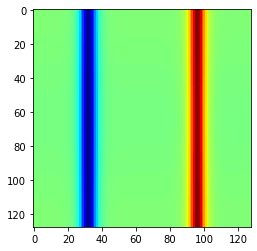

In [45]:
# plot the solution at the final timestamp

plt.imshow(omegaT, cmap='jet')